# Does faculty salary vary by gender and/or rank?

## Set up

Before getting started, the only addtional library you should have to install (that did not come with the anaconda python distribution) is `seaborn`, a package for visualization:

```
pip install seaborn
```

Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

Before performing the statistical analysis here, you should run the `exploratory-analysis` file to get to know your data.

In [1]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [2]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data= pd.read_table(data, sep='\s+')
salary_data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


## Simple linear regression: what is the salary increase associated with each additional year in your current position (`yr`)?

In [3]:
# Create a simple linear model that assesses the relationship between 
# years in current position with salary
model = smf.ols(formula='sl ~ yr', data=salary_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     48.22
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.34e-09
Time:                        13:06:40   Log-Likelihood:                -507.38
No. Observations:                  52   AIC:                             1019.
Df Residuals:                      50   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.817e+04   1003.658     18.100      0.000    1.62e+04    2.02e+04
yr           752.7978    108.409      6.944      0.000     535.051     970.544
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.015
Skew:                           0.509   Prob(JB):                       0.0815
Kurtosis:                       4.130   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?

>__Betas (coefficients)__: Tells you whether there is a positive or negative correlation between each independent variable the dependent variable. There is a strong positive correlation between year and salary - Each additional year is associated with +752.8 salary. 

>__Standard errors on the betas__: Represents the average distance that the observed values fall from the regression line. Yr has a standard error of 108.409

>__Confidence intervals__: The interval has a probability of 95% to contain the true value. Year has a confidence interval of 535.051-970.544 associated with salary.

>__R Squared__: The higher the R-squared (0-100%), the better the model. The R-squared value here shows that the model explains 49% of the variability of the response data around its mean.

In [4]:
# Create a `predictions` column of your dataframe by 
# making predictions from your linear model
y_preds = results.predict(salary_data.yr)
salary_data['preds'] = y_preds

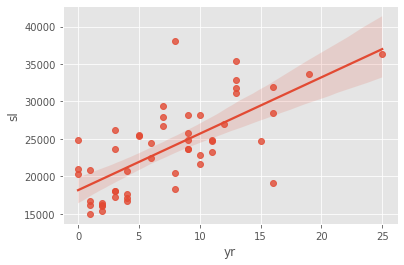

In [5]:
# Draw a scatterplot with your best fit line to show how well the model fits our data
sns.regplot(x="yr", y="sl", data=salary_data)

## Multiple Regression

Predict using **multiple** independent variables

In [6]:
# Using multiple regression, create a linear model that uses 
# sex, rank, and years in current rank variables to estimate salary
model = smf.ols(formula='sl ~ sx + rk + yr', data=salary_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.64e-18
Time:                        13:06:41   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000    1.49e+04    1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533   -2203.323    1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000    2551.030    6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000    7647.536    1.13e+04
yr                390.9358     75.383      5.186      0.000     239.285     542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?
- What do you find surprising...?

>__Betas (coefficients)__: Each additional year is associated with +390.94 salary. Being male is associated with -524.1492 salary. Being in full time rank is associated with a +9483.84 salary and +4373.92 for associate rank, relative to assistant.

>__Standard errors on the betas__: Represents the average distance that the observed values fall from the regression line. Yr has a standard error of 75.383, which is better than the simple linear regression model from before. Sex (male) has an error of 834.69, rank (associate) of 906.12, and rank (full) of 912.8.

>__Confidence intervals__: The interval has a probability of 95% to contain the true value. Yr has a confidence interval of 239.285-542.587, which is smaller than the earlier simple linear regression model.

>__R Squared__: The higher the R-squared (0-100%), the better the model. The R-squared value of this model shows that the model explains 84.6% of the variability of the response data around its mean.

In [7]:
# Create a `mult_predictions` column of your dataframe by 
# making predictions from your multiple regression model
y_preds = results.predict(salary_data)
salary_data['mult_preds'] = y_preds
salary_data.head()

,sx,rk,yr,dg,yd,sl,preds,mult_preds
0,male,full,25,doctorate,35,36350,36986.091481,35164.048275
1,male,full,13,doctorate,22,35350,27952.518392,30472.819188
2,male,full,10,doctorate,23,28200,25694.125120,29300.011916
3,female,full,7,doctorate,27,26775,23435.731847,28651.353854
4,male,full,19,masters,30,33696,32469.304936,32818.433731


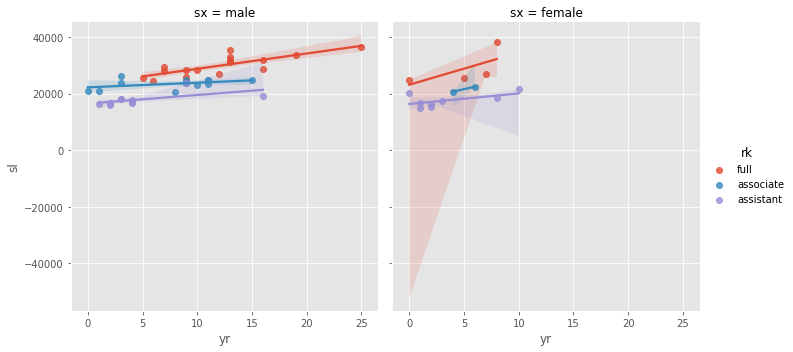

In [8]:
# Create a scatter plot with years since degree on the x axis, and 
# Salary on the y axis. Show points for both the data, and the multiple regression values.
sns.lmplot(x="yr", y="sl", hue="rk",
           col="sx", data=salary_data);

## Assess predictions

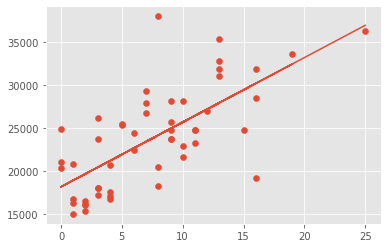

In [9]:
# Make a scatterplot that compares the data (x) to the predictions (y)
# Add a line showing where the perfect values would be (i.e., data against data)
plt.scatter(salary_data.yr, salary_data.sl)
plt.plot(salary_data.yr, salary_data.preds)
plt.show()

What are the r-squared values of the two models?
Which one explains more variance?
>The multi-linear regression model explains 84.6% of the variance as opposed to 49% for the single linear regression model, and therefore the former explains more.

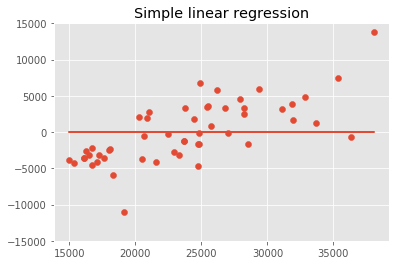

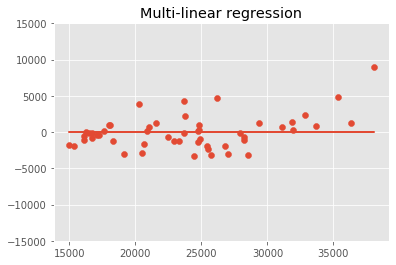

In [10]:
# Plot the salary v.s. the *residuals* (difference between actual and predicted values)
# Create a separate (adjacent) plot for each model
# Add a horizontal line at 0 to help interpret the graph
plt.scatter(salary_data.sl, salary_data.sl - salary_data.preds)
plt.ylim(-15000, 15000)
plt.plot(salary_data.sl, [0] * len(salary_data.sl))
plt.title('Simple linear regression')
plt.show()

plt.scatter(salary_data.sl, salary_data.sl - salary_data.mult_preds)
plt.ylim(-15000, 15000)
plt.plot(salary_data.sl, [0] * len(salary_data.sl))
plt.title('Multi-linear regression')
plt.show()

Provide an interpretation for these graphs:

> We see a lot more points closer to the 0 horizontal line in the multi-linear regression model than the simple linear regression. This means that the difference between the predictions and the actual values are closer to 0 for more points, meaning that the model is predicting better with a smaller error. 